In [1]:
import requests
from bs4 import BeautifulSoup as soup
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

## Regressão Linear

In [2]:
covid = pd.read_csv('covid-muriae-auto.csv', sep=';')

In [3]:
covid

,Data,Dose 1,Dose 2,Casos Totais,Casos Ativos,Óbitos,Casos Diários,Óbitos Diários
0,2020-05-19,0,0,67,39,3,0,0
1,2020-05-20,0,0,77,49,3,10,0
2,2020-05-21,0,0,83,45,4,6,1
3,2020-05-22,0,0,95,57,4,12,0
4,2020-05-23,0,0,95,57,4,0,0
...,...,...,...,...,...,...,...,...
574,2021-12-09,84501,76862,11896,2,318,0,0
575,2021-12-10,84501,77012,11896,2,318,0,0
576,2021-12-11,84501,77012,11896,2,318,0,0
577,2021-12-12,84501,77012,11896,2,318,0,0


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
vacinacao = covid[covid['Dose 1'] > 0]
vacinacao.reset_index(drop=True, inplace=True)

In [6]:
X = vacinacao.drop('Casos Ativos', axis=1)
y = vacinacao[['Casos Ativos']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [8]:
reg = LinearRegression()
reg.fit(X_train[['Dose 1', 'Dose 2']], y_train)

LinearRegression()

In [9]:
y_pred = reg.predict(X_test[['Dose 1', 'Dose 2']])

In [10]:
results = pd.concat([X_test[['Data']], pd.DataFrame(y_pred)], axis=1).sort_values('Data')

In [11]:
results.columns = ['Data', 'pred']

In [12]:
plt.rcParams.update({'figure.facecolor': 'white'})

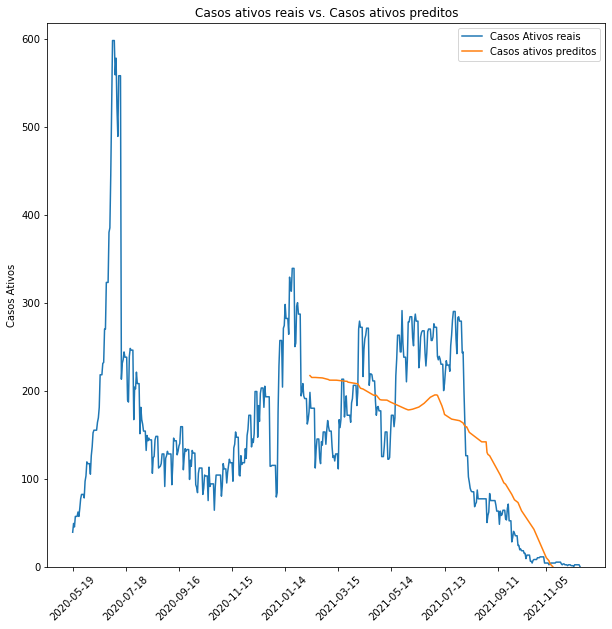

In [13]:
plt.figure(figsize=(10,10))

plt.plot(covid['Data'], covid['Casos Ativos'], label='Casos Ativos reais')
plt.plot(results['Data'], results['pred'], label='Casos ativos preditos')
plt.xticks(covid['Data'].values[::60], rotation=45)
plt.title('Casos ativos reais vs. Casos ativos preditos')
plt.ylabel('Casos Ativos')
plt.ylim(0, max(covid['Casos Ativos']+20))
plt.legend()
print('')

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

In [15]:
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

47.539399317044634
0.6432960251518611


## Transformação Log

In [16]:
from sklearn.preprocessing import FunctionTransformer

In [17]:
cols = X.select_dtypes(include='number').columns

sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

for col in cols:
    X['{}_sqrt'.format(col)] = sqrt_transformer.transform(X[col].values.reshape(-1, 1))
X

,Data,Dose 1,Dose 2,Casos Totais,Óbitos,Casos Diários,Óbitos Diários,Dose 1_sqrt,Dose 2_sqrt,Casos Totais_sqrt,Óbitos_sqrt,Casos Diários_sqrt,Óbitos Diários_sqrt
0,2021-02-08,4075,114,7061,142,51,0,63.835727,10.677078,84.029757,11.916375,7.141428,0.0
1,2021-02-09,4075,253,7082,143,21,1,63.835727,15.905974,84.154620,11.958261,4.582576,1.0
2,2021-02-10,4075,786,7115,143,33,0,63.835727,28.035692,84.350459,11.958261,5.744563,0.0
3,2021-02-11,4076,1800,7156,143,41,0,63.843559,42.426407,84.593144,11.958261,6.403124,0.0
4,2021-02-12,4076,2243,7165,144,9,1,63.843559,47.360321,84.646323,12.000000,3.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2021-12-09,84501,76862,11896,318,0,0,290.690557,277.239968,109.068786,17.832555,0.000000,0.0
310,2021-12-10,84501,77012,11896,318,0,0,290.690557,277.510360,109.068786,17.832555,0.000000,0.0
311,2021-12-11,84501,77012,11896,318,0,0,290.690557,277.510360,109.068786,17.832555,0.000000,0.0
312,2021-12-12,84501,77012,11896,318,0,0,290.690557,277.510360,109.068786,17.832555,0.000000,0.0


In [18]:
X.columns

Index(['Data', 'Dose 1', 'Dose 2', 'Casos Totais', 'Óbitos', 'Casos Diários',
       'Óbitos Diários', 'Dose 1_sqrt', 'Dose 2_sqrt', 'Casos Totais_sqrt',
       'Óbitos_sqrt', 'Casos Diários_sqrt', 'Óbitos Diários_sqrt'],
      dtype='object')

In [19]:
X_log = X[['Data', 'Dose 1_sqrt', 'Dose 2_sqrt', 'Casos Totais_sqrt',
       'Óbitos_sqrt', 'Casos Diários_sqrt', 'Óbitos Diários_sqrt']]
y_log = np.log(vacinacao['Casos Ativos'])

X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size = 0.2, random_state=42)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

C:\Users\GCPeppe\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
#forçando o último registro a aparecer nos dataframes de teste

i = X_train[X_train['Data'] == max(X_train['Data'])].index[0]

X_test = pd.concat([X_test, pd.DataFrame({'Data': X_train.loc[i, 'Data'],
                    'Dose 1_sqrt': X_train.loc[i, 'Dose 1_sqrt'], 
                    'Dose 2_sqrt': X_train.loc[i, 'Dose 2_sqrt'],
                    'Casos Totais_sqrt': X_train.loc[i,'Casos Totais_sqrt'] , 
                    'Óbitos_sqrt': X_train.loc[i, 'Óbitos_sqrt'],
                    'Casos Diários_sqrt': X_train.loc[i, 'Casos Diários_sqrt'], 
                    'Óbitos Diários_sqrt': X_train.loc[i, 'Óbitos Diários_sqrt']}, 
                                         index=[len(X_test)+1])], axis=0)
y_test = pd.concat([pd.DataFrame(y_test), 
                    pd.DataFrame({'Casos Ativos': np.log(y['Casos Ativos'][y.index == max(y.index)].values[0])}, index=[len(X_test)+1])], 
                   axis=0)

<ipython-input-20-666c357e4844>:14: RuntimeWarning: divide by zero encountered in log
  pd.DataFrame({'Casos Ativos': np.log(y['Casos Ativos'][y.index == max(y.index)].values[0])}, index=[len(X_test)+1])],


In [21]:
X_train.drop([i], inplace=True)
y_train.drop([i], inplace=True)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

C:\Users\GCPeppe\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
reg = LinearRegression()
reg.fit(X_train[['Dose 1_sqrt', 'Dose 2_sqrt']], y_train.replace([np.inf, -np.inf], 0))

LinearRegression()

In [49]:
y_pred = reg.predict(X_test[['Dose 1_sqrt', 'Dose 2_sqrt']])

In [50]:
results = pd.concat([X_test[['Data']], pd.DataFrame(y_pred)], axis=1).sort_values('Data')

In [51]:
results.columns = ['Data', 'pred']

C:\Users\GCPeppe\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


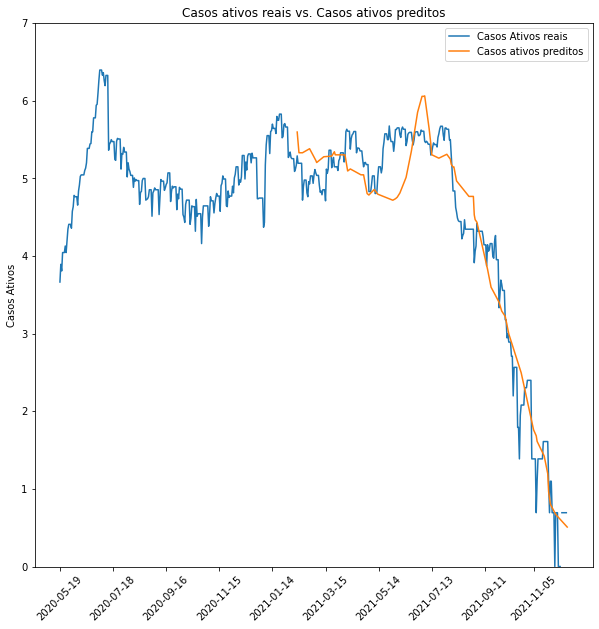

In [52]:
plt.figure(figsize=(10,10))

plt.plot(covid['Data'], np.log(covid['Casos Ativos']), label='Casos Ativos reais')
plt.plot(results['Data'], results['pred'], label='Casos ativos preditos')
plt.xticks(covid['Data'].values[::60], rotation=45)
plt.title('Casos ativos reais vs. Casos ativos preditos')
plt.ylabel('Casos Ativos')
plt.ylim(0,7)
plt.legend()
print('')

In [ ]:
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_squared_log_error(y_test, y_pred))

In [46]:
[x for x in y_train.replace([np.inf, -np.inf], 0)]

[5.455321115357702,
 5.4638318050256105,
 5.598421958998375,
 5.384495062789089,
 4.820281565605037,
 3.4965075614664802,
 0.0,
 2.5649493574615367,
 1.3862943611198906,
 4.836281906951478,
 4.31748811353631,
 5.472270673671475,
 1.0986122886681098,
 5.631211781821365,
 5.66988092298052,
 5.19295685089021,
 2.302585092994046,
 4.836281906951478,
 5.043425116919247,
 2.302585092994046,
 5.209486152841421,
 5.537334267018537,
 4.343805421853684,
 1.3862943611198906,
 4.343805421853684,
 0.6931471805599453,
 4.31748811353631,
 5.62040086571715,
 5.493061443340548,
 0.0,
 0.6931471805599453,
 5.572154032177765,
 5.631211781821365,
 5.030437921392435,
 0.6931471805599453,
 5.572154032177765,
 5.030437921392435,
 2.8903717578961645,
 4.804021044733257,
 5.198497031265826,
 2.1972245773362196,
 5.459585514144159,
 5.389071729816501,
 5.147494476813453,
 4.762173934797756,
 4.890349128221754,
 3.9512437185814275,
 4.07753744390572,
 5.147494476813453,
 5.602118820879701,
 2.70805020110221,
 5.